## Brown Datathon - Predicting house buying based on Credit Info

Data provided by Citizens Bank (Public use available)

### Setting Environment

In [1]:
## Load Basic Package 
print('PYTHON & PACKAGE VERSION CONTROL')
print('----------')
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))
import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))
import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 
import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 
import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

#misc libraries
import random
import time
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

print('----------')

PYTHON & PACKAGE VERSION CONTROL
----------
Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
pandas version: 0.25.3
matplotlib version: 3.0.2
NumPy version: 1.17.4
SciPy version: 1.1.0
IPython version: 7.2.0
scikit-learn version: 0.20.1
----------


In [2]:
## Path setting

path = r'C:\Users\ADMIN\Desktop\Brown_Datathon\citizens-home-financing-challenge'                    
import os
print('Path:', path)
print('----------')
print('\n'.join(os.listdir(path)))

Path: C:\Users\ADMIN\Desktop\Brown_Datathon\citizens-home-financing-challenge
----------
DatathonDictionaries.xlsx
dictionaries
zip9_coded_201904_pv.csv
zip9_coded_201905_pv.csv
zip9_coded_201906_pv.csv
zip9_coded_201907_pv.csv
zip9_coded_201908_pv.csv
zip9_coded_201909_pv.csv
zip9_demographics_coded_pv.csv


### First Loading Dataset
Be careful for bigger dataset! (1.5GB couuld take about 30s through Modin)

If that is the case, use sample method in read_csv()!


##### Modin can be faster. However, if doing functions below, use regular Pandas!
- df.groupby(by='wp_type')
- df.drop_duplicates()
- df.describe()
- df['seconds'].max()

In [ ]:
# Pandas can have trouble dealing with moderately large data, here's a sampling example
total_row_n = 6009259 # number of records in file
sample_row_n = 60000 # sample size (can/should be changed to your preference)
skip_row_list = sorted(random.sample(range(1,total_row_n+1), total_row_n-sample_row_n))

sep_df = pd.read_csv(root_path + "zip9_coded_201908_pv.csv", skiprows=skip_row_list)
demo_df = pd.read_csv(root_path + "zip9_demographics_coded_pv.csv", skiprows=skip_row_list)




In [3]:
import os
os.environ["MODIN_ENGINE"] = "dask"  # Modin will use Dask
import modin.pandas as pd
pd.__version__
# import modin.pandas as pd
# %%timeit -n1 -r1

'0.7.0'

In [7]:
t0 = time.time()

data_path = path
data_file = 'zip9_coded_201909_pv.csv'
data_set = pd.read_csv(data_path+'/'+data_file)

print('Complete loading df!')

t1 = time.time()
print("Time to process {}s".format(round(t1-t0,2)))

Complete loading df!
Time to process 31.84s


In [ ]:
df = data_set.copy()

In [ ]:
#Basic Checking for dataset
print('Dataset Shape:\n', df.shape)
df.head()

### New Inspection Tool: d-tale
Github: https://github.com/man-group/dtale

In [ ]:
import dtale
d = dtale.show(df)
print('Complete loading df!')
d

## Data Wrangling
### Basic Info about Dataset 

In [ ]:
print(df.info())
print("-"*10)
print('Dataset Shape:\n', df.shape)
print("-"*10)

### Data Cleaning: NA, Empty String, Meaningless Value
#### Checking 

In [ ]:
print('Dataset columns with null & None values:\n', df.isnull().sum())
print('Note: Please Check for possible null-related values (empty string, meaningless value...)')
# print(df2.describe())
print("-"*10)

## Check for 'empty string'
## If this generate non-empty array, then dataset contains empty string in following position.
# np.where(df.applymap(lambda x: x == ''))
print(df[df.applymap(lambda x: x == '').any(axis=1)])
print("p.s. If the dataframe above show no rows, then the dataframe doesn't have any empty string.")

#### Data Cleaning: A variable & B variable

In [ ]:
df.describe(include = 'all')

In [ ]:
df.describe().apply(lambda s:s.apply(lambda x:format(x, 'f')))

### Data Cleaning: String Manipulation

## Explonatory Analysis

### Exploratory: Target Variable

In [ ]:
## Target Variable
target_variable_name = 'Survived'
print('target variable:', target_variable_name)
print('variable type:', type(df[target_variable_name][0]))

# This is for changing the data type in some cases.
# df_Regress[target_variable_name] = df_Regress[target_variable_name].replace('[^.0-9]', '', regex=True).astype(float)

In [ ]:
## Classifier only
df_Class = df
target_sum = pd.DataFrame([df_Class[target_variable_name].value_counts(),
               round(df_Class[target_variable_name].value_counts()/sum(df_Class[target_variable_name].value_counts()), 4)],
              index=['Count','Percentage']).T
print('Total Observations:', sum(df_Class[target_variable_name]))
print(target_sum.astype({"Count": int}))

fig = plt.figure(figsize=[3,5])
ax = sns.barplot(y="Count", x=['0','1'], data=target_sum)
for p, i in zip(ax.patches, [0,1]):
    percent = target_sum['Percentage'][i]
    ax.annotate('{:.2f}%'. format(percent*100), (p.get_x()+0.4, p.get_height()-50), ha='center', size=15, color='white')

In [ ]:
## Regression only
df_Regress = df
plt.figure(figsize=(10,5))
sns.distplot(df_Regress[target_variable_name])
plt.figure(figsize=(10,5))
plt.hist(x=df_Regress[target_variable_name])

In [ ]:
# data_path
data_path = r'C:\Users\ADMIN\Desktop\Brown_Datathon\citizens-home-financing-challenge'

In [ ]:
# data_path = r'C:\Users\ADMIN\Desktop\Brown_Datathon\citizens-home-financing-challenge'
# tar_data_file = 'ip9_demographics_coded_pv.csv'
# tar_data_set = pd.read_csv(data_path+'/'+tar_data_file)

                           
data_t1 = pd.read_csv(data_path+'/'+'zip9_demographics_coded_pv.csv')
 
print('Complete loading df!')

In [ ]:
target_variable_name = 'homebuyers'

df_Regress = data_t1
plt.figure(figsize=(10,5))
sns.distplot(df_Regress[target_variable_name])
plt.figure(figsize=(10,5))
plt.hist(x=df_Regress[target_variable_name])

In [ ]:
df_Regress[target_variable_name].value_counts()

### Exploratory: Target Variable vs Other Variable

In [112]:
path

'C:\\Users\\ADMIN\\Desktop\\Brown_Datathon\\citizens-home-financing-challenge'

In [ ]:
path2 =r'C:\Users\ADMIN\Desktop\Brown_Datathon'

### Fast Auto Visuailization Package:  AutoViz


In [113]:
n = 6009259 # number of records in file
s = 60000 # sample size (can/should be changed to your preference)

skip_list = sorted(random.sample(range(1,n+1),n-s))
vis_df = pd.read_csv(path +'/'+ "zip9_coded_201908_pv.csv", skiprows=skip_list, dtype={'zip5': str})

In [117]:
# vis_df = pd.read_csv(path2+'/'+'merge_09_df.csv', )
# vis_df

sep_demo_merge11 = vis_df.merge(demo_df,
                              how='inner',
                              on='zip9_code',
                              suffixes=('_sep','_demo'),
                              validate='one_to_one')


In [122]:
### AutoViz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

In [123]:
sep_demo_merge11.head()

,zip5_sep,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,...,studentloan_open,bankcard_open,homeequity_open,mortgage_open,zip5_demo,age,household_count,person_count,homebuyers,first_homebuyers
0,01002,313053,32873.960000,3541.160000,2.600000,0.242298,34343.600000,4291.600,3.080000,0.240726,...,0.160000,0.880000,0.040,0.360000,1002,52.402830,17,25,0,0
1,01002,2387426,8157.142857,1520.285714,1.428571,0.518875,10528.714286,1854.000,2.857143,0.368537,...,0.142857,0.714286,0.000,0.285714,1002,42.184360,5,7,0,0
2,01002,3586818,27965.000000,1771.500000,2.375000,0.064772,30335.000000,2073.375,3.125000,0.069470,...,0.000000,0.750000,0.375,0.625000,1002,54.033637,5,8,0,0
3,01002,3799534,15037.500000,646.250000,1.375000,0.042347,17425.000000,667.125,2.500000,0.035320,...,0.000000,0.750000,0.000,0.250000,1002,70.873144,7,8,0,0
4,01002,4947434,3180.000000,204.600000,0.800000,0.348689,4310.000000,217.400,1.500000,0.255237,...,0.000000,0.400000,0.000,0.000000,1002,34.668734,7,10,0,0


In [124]:
target_variable_name = 'homebuyers'

##
sep = '/'
dft = AV.AutoViz('', ',', target_variable_name, sep_demo_merge11)



Shape of your Data Set: (60000, 59)
Classifying variables in data set...
    58 Predictors classified...
        This does not include the Target column(s)
    16 variables removed since they were ID or low-information variables
38 numeric variables in data exceeds limit, taking top 30 variables
Number of numeric variables = 38
    Number of variables removed due to high correlation = 7 
    Adding 4 categorical variables to reduced numeric variables  of 31
Selected No. of variables = 35 
Finding Important Features...
Not able to read or load file. Please check your inputs and try again...


In [ ]:
# Generating a whole new html page of the dataframe. Should open it through outside the notebook!
import webbrowser
dff.to_html("df_web.html")
url = "http://localhost:8888/files/notebook/df_web.html"
# webbrowser.open(url,new=2)

### Merging Data

#### Fields

In [ ]:
demo_df = pd.read_csv(data_path+'/'+'zip9_demographics_coded_pv.csv')
sep_df = df

In [ ]:
sep_demo_merge = sep_df.merge(demo_df,
                              how='inner',
                              on='zip9_code',
                              suffixes=('_sep','_demo'),
                              validate='one_to_one')

sep_demo_merge = sep_demo_merge.drop(['Unnamed: 0', 'zip5_demo'],  axis=1)

In [ ]:
sep_demo_merge.head()

In [ ]:
d = dtale.show(df)
print('Complete loading df!')

In [ ]:
# sep_demo_merge.to_csv('merge_09_df.csv')
data_path = r'C:\Users\ADMIN\Desktop\Brown_Datathon'

In [ ]:
# generate a smaller df to practice Tableau

sep_demo_merge = pd.read_csv(data_path+'/'+'merge_09_df.csv')
small_df = sep_demo_merge.sample(frac=0.05, random_state=1)
print('complete')

In [ ]:
# small_df.to_csv('small_df.csv')
mid_df = sep_demo_merge.sample(frac=0.2, random_state=1)
mid_df.shape

In [ ]:
mid_df.to_csv('mid_df.csv')
print('complete!')

#### Area assigned by ZIP Code 

In [ ]:
from uszipcode import SearchEngine

In [ ]:
small_df['district'] = [search.by_zipcode(i).values()[3] for i in small_df['zip5_sep']]
small_df.head()

# tt.head()    
# print(search.by_zipcode(tt['zip5_sep']).values()[3])

In [ ]:
# small_df.head()['district'].str.split(', ', expand=True)
# tt = small_df.head()
# tt['district'].str.split(', ', expand=True)
tt_1 = pd.concat([tt, tt['district'].str.split(', ', expand=True)], axis=1, join='inner')
tt_1.rename(columns={0: 'small_district', 2:'state'}, inplace=True)
tt_1
# small_df.

# result = pd.concat([df1, df4], axis=1, join='inner')


### New Sample: Claire


In [ ]:
col_list = ['age',
'autoloan_open',
'bankcard_balance',
'bankcard_limit',
'bankcard_open',
'bankcard_trades',
'bankcard_util',
'first_homebuyers',
'homebuyers',
'homeequity_open',
'household_count',
'mortgage_open',
'mortgage1_loan_to_value',
'person_count',
'studentloan_open',
'total_homeequity_balance',
'total_homeequity_limit',
'total_homeequity_trades',
'total_mortgage_balance',
'total_mortgage_limit',
'total_mortgage_trades',
'total_revolving_balance',
'total_revolving_limit',
'total_revolving_trades',
'total_revolving_util',
'zip5_sep',
'zip9_code']

col_list1 = ['zip5','zip9_code',
'autoloan_open',
'bankcard_balance',
'bankcard_limit',
'bankcard_open',
'bankcard_trades',
'bankcard_util',
'homeequity_open',
'mortgage_open',
'mortgage1_loan_to_value',
'studentloan_open',
'total_homeequity_balance',
'total_homeequity_limit',
'total_homeequity_trades',
'total_mortgage_balance',
'total_mortgage_limit',
'total_mortgage_trades',
'total_revolving_balance',
'total_revolving_limit',
'total_revolving_trades',
'total_revolving_util']


In [ ]:
data_set = pd.read_csv(path+'/'+'zip9_coded_201908_pv.csv', usecols=col_list1)
print('complete')

In [ ]:
demo_df = pd.read_csv(path+'/'+'zip9_demographics_coded_pv.csv')
print('complete!')

In [ ]:
sep_demo_merge = data_set.merge(demo_df,
                              how='inner',
                              on='zip9_code',
                              suffixes=('_sep','_demo'),
                              validate='one_to_one')
sep_demo_merge = sep_demo_merge.drop(['zip5_demo'], axis=1)
# check!

In [ ]:
sep_demo_merge.to_csv('merge_08_df.csv',index=False)
print('complete')
# check!

In [ ]:
path = r'C:\Users\ADMIN\Desktop\Brown_Datathon\citizens-home-financing-challenge'
path2 = r'C:\Users\ADMIN\Desktop\Brown_Datathon'

In [ ]:
## pipeline
for name in ['zip9_coded_201906_pv.csv', 'zip9_coded_201907_pv.csv']:
    data_set = pd.read_csv(path+'/'+name, usecols=col_list1)
    sep_demo_merge = data_set.merge(demo_df,
                              how='inner',
                              on='zip9_code',
                              suffixes=('_sep','_demo'),
                              validate='one_to_one')
    sep_demo_merge = sep_demo_merge.drop(['zip5_demo'], axis=1)
    sep_demo_merge.to_csv('new_'+name, index=False)
    print('complete '+ name)


In [ ]:
data_set = pd.read_csv(path+'/'+'zip9_coded_201907_pv.csv', names=['zip5_sep','zip9_code'])


## Final works!!! New Feature: Jeff

In [3]:
# path
# path2
path2 =r'C:\Users\ADMIN\Desktop\Brown_Datathon'
econ_df = pd.read_csv(path2+'/'+'17zpallnoagi.csv')
print('complete')


complete


In [4]:
econ_df.head()
econ_df['STATEFIPS'].value_counts(dropna=False)
econ_df = econ_df.dropna()
econ_df.head()
# test = econ_df[econ_df['STATEFIPS'] is not np.nan()]


,STATEFIPS,STATE,ZIPCODE,N1,MARS1,MARS2,MARS4,N02650,A02650,N18500,A18500,N18800,A18800,N18300,A18300,N19300,A19300,N19500,A19500
1,1.0,AL,35004.0,5130.0,2140.0,2120.0,780.0,5130.0,292671.0,1420.0,1139.0,1240.0,315.0,1700.0,7516.0,1380.0,8458.0,0.0,0.0
2,1.0,AL,35005.0,3170.0,1350.0,870.0,900.0,3170.0,125810.0,600.0,472.0,560.0,216.0,810.0,2888.0,580.0,2621.0,0.0,0.0
3,1.0,AL,35006.0,1210.0,440.0,580.0,170.0,1210.0,59725.0,190.0,163.0,200.0,74.0,240.0,1070.0,160.0,856.0,0.0,0.0
4,1.0,AL,35007.0,11930.0,4720.0,5180.0,1790.0,11930.0,714402.0,3400.0,4096.0,2920.0,985.0,4030.0,20896.0,3340.0,21088.0,50.0,138.0
5,1.0,AL,35010.0,7890.0,3000.0,2710.0,2060.0,7890.0,391523.0,1280.0,1793.0,1160.0,299.0,1590.0,8585.0,1100.0,8123.0,30.0,115.0


In [5]:
econ = econ_df[['A18800']]
econ
# econ_df['STATEFIPS'] == True




,A18800
1,315.0
2,216.0
3,74.0
4,985.0
5,299.0
...,...
27755,31.0
27756,287.0
27757,151.0
27758,52.0


In [6]:
## new data stardization
from sklearn import preprocessing


In [7]:

# Create the Scaler object
scaler = preprocessing.StandardScaler()
scaled_econ = scaler.fit_transform(np.array(econ))
scaled_econ = np.reshape(scaled_econ, (scaled_econ.shape[0],))
scaled_econ.tolist()

[-0.0630129476313388,
 -0.18760564968461502,
 -0.3663143738418395,
 0.7801901874766922,
 -0.08314914190257536,
 -0.32730049744131867,
 -0.07559806905086165,
 -0.4330155173653106,
 0.061579754421937416,
 1.074682028693527,
 0.5196781740925691,
 -0.3537292524223166,
 -0.38645056811307604,
 -0.4141378352360263,
 -0.4380495659331197,
 0.22770335715963905,
 -0.36883139812574406,
 0.3963439841812452,
 -0.27066745105346585,
 -0.15991838256166474,
 -0.31849091244765265,
 -0.3738654466935532,
 -0.1624354068455693,
 -0.3713484224096486,
 -0.30213025460227294,
 -0.0806321176186708,
 -0.1624354068455693,
 -0.2819940603310364,
 -0.4116208109521218,
 -0.21025886823975615,
 -0.4179133716618832,
 -0.02399907123081797,
 -0.1385236761484759,
 0.43535786058176607,
 -0.3940016409647898,
 -0.4141378352360263,
 -0.28451108461494096,
 -0.3839335438291715,
 -0.2719259631954181,
 0.7109720196693166,
 -0.42294742022969234,
 -0.2656334024856567,
 -0.4355325416492152,
 -0.44685915092678574,
 -0.2555653053500384,


In [8]:

# econ_df['ZIPCODE'].astype('int64')
# econ_df
# econ_df['ZIPCODE']
new_econ_df = pd.DataFrame(scaled_econ.tolist(), index = econ_df['ZIPCODE'].astype('int64'))
new_econ_df = new_econ_df.reset_index()
new_econ_df.columns = ['zip5_sep', 'Personal_property_taxes_amount']
new_econ_df.head()


,zip5_sep,Personal_property_taxes_amount
0,35004,-0.063013
1,35005,-0.187606
2,35006,-0.366314
3,35007,0.780190
4,35010,-0.083149


## Claire data + new econ metric



In [9]:
# from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
# fs = FeatureSelector(data = train, labels = train_labels)
path2

'C:\\Users\\ADMIN\\Desktop\\Brown_Datathon'

In [10]:
data_file = 'Total_data.csv'
final_df = pd.read_csv(path2+'/'+data_file)
print('complete')



complete


In [11]:
# final_df = final_df.drop('Unnamed: 0', axis = 1)
final_df.head()

final_df2 = final_df.merge(new_econ_df,
                              how='inner',
                              on='zip5_sep',
                              suffixes=('_sep','_demo'),
                              validate='many_to_many')

In [27]:
final_df3= final_df2[['person_count', 'age', 
                        'mortgage_open', 'studentloan_open', 'bankcard_balance', 
                        'total_revolving_util', 'total_revolving_trades', 'autoloan_open', 
                        'total_homeequity_limit', 'total_homeequity_balance', 'total_mortgage_balance', 
                        'zip5_sep', 'homeequity_open', 'Personal_property_taxes_amount','homebuyers']]

In [50]:
# final_df3.head()
# final_df2.head()['total_homeequity_balance']
final_df2.shape
final_df3.shape

(5992956, 15)

In [42]:
# no_nan_df = final_df2.dropna(how='any')


In [43]:
# no_nan_df.shape

(2747627, 28)

In [28]:

# n = 6009259 # number of records in file
# s = 60000 # sample size (can/should be changed to your preference)
# 
# final_df2 

# skip_list = sorted(random.sample(range(1,n+1),n-s))
# sep_df = pd.read_csv(root_path + "zip9_coded_201908_pv.csv", skiprows=skip_list, dtype={'zip5': str})
# demo_df = pd.read_csv(root_path + "zip9_demographics_coded_pv.csv", skiprows=skip_list, dtype={'zip5': str})

# final_df2_sample = final_df2.sample(frac=0.05, random_state=1)
final_df3_sample = final_df3.sample(frac=0.05, random_state=1)
print('complete')

complete


## Machine Learning

In [29]:
target_variable_name = 'homebuyers'

from sklearn import model_selection
train_X, test_X, train_y, test_y = model_selection.train_test_split(final_df3_sample.drop(target_variable_name, axis = 1), final_df3_sample[target_variable_name], test_size=0.3, random_state = 10)

# generate the train and test data suitable for this package
train = train_X.copy()
train[target_variable_name] = train_y
test = test_X.copy()
test[target_variable_name] = test_y




In [ ]:
# train_y

In [18]:
from autoviml.Auto_ViML import Auto_ViML

In [ ]:
# final

In [19]:
import pickle

yes
Train (Size: 209753,28) has Single_Label with target: ['homebuyers']
"
 ################### Regression  ######################
    Top columns in Train with missing values: ['total_homeequity_balance', 'total_homeequity_limit', 'total_mortgage_balance', 'total_mortgage_limit', 'bankcard_util']
         and their missing value totals: [110791, 110791, 38494, 38494, 1197]
Classifying variables in data set...
    Number of Numeric Columns =  21
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  2
    Number of Columns to Delete =  0
    27 Predictors classified...
        This does not include the Target column(s)
    2 variables removed since they were ID or low-informat

<Figure size 720x432 with 0 Axes>

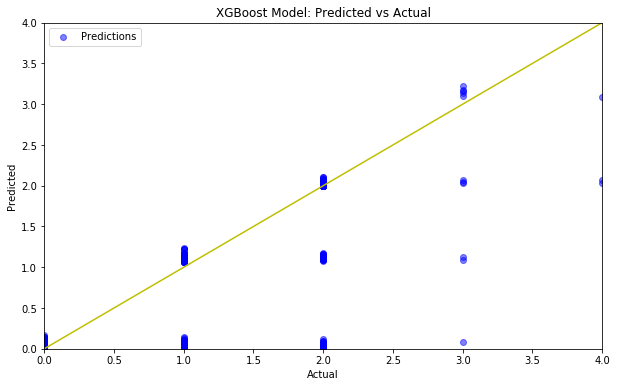

    MAE = 0.0346
    MAPE = inf%
    RMSE = 0.1541
    MAE as % std dev of Actuals = 14.2%
    Normalized RMSE (% of MinMax of Actuals) = 4%
    Normalized RMSE (% of Std Dev of Actuals) = 63%
    Time taken for Ensembling: 265.1 seconds
########################################################
Completed Ensemble predictions on held out data


<Figure size 720x432 with 0 Axes>

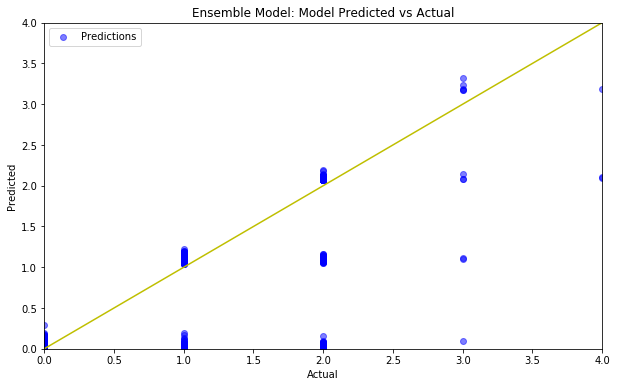

    MAE = 0.0358
    MAPE = inf%
    RMSE = 0.1543
    MAE as % std dev of Actuals = 14.7%
    Normalized RMSE (% of MinMax of Actuals) = 4%
    Normalized RMSE (% of Std Dev of Actuals) = 63%
After multiple models, Ensemble Model Results:
    RMSE Score = 0.3

Single Model is better than Ensembling Models for this data set.


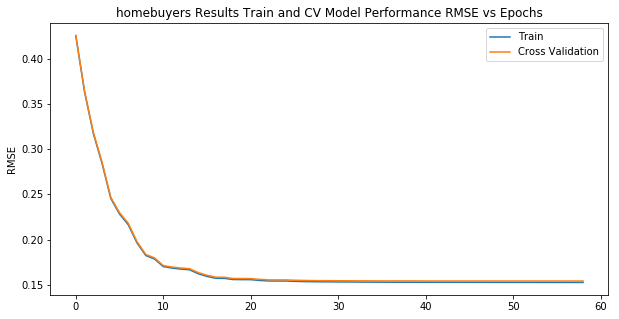

    Time taken for this Target (in seconds) = 9100
[05:46:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:46:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
[05:46:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Training time taken in seconds = 8
########################################################
Completed Ensemble predictions on held out data
    Savi

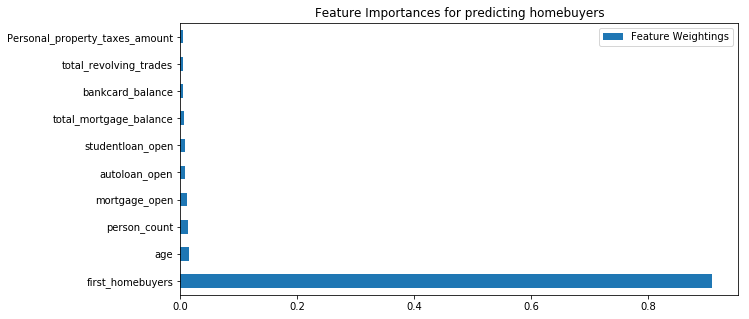

In [20]:
## Run the AutoML!
#### If Boosting_Flag = True => XGBoost, Fase=>ExtraTrees, None=>Linear Model
sample_submission=''
scoring_parameter = 'balanced-accuracy'

m, feats, trainm, testm = Auto_ViML(train, target_variable_name, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)                      

# p.s. This could run much more than what the package estimated!

# m, feats, trainm, testm = Auto_ViML(train, target_variable_name, test, sample_submission,
#                                     scoring_parameter=scoring_parameter,
#                                     hyper_param='GS',feature_reduction=True,
#                                      Boosting_Flag=True,Binning_Flag=False,
#                                     Add_Poly=0, Stacking_Flag=False,                                    
#                                     Imbalanced_Flag=False, 
#                                     verbose=1)


In [21]:
filename = 'finalized_model.sav'
pickle.dump(m, open(filename, 'wb'))

In [30]:
## second time without first homebuyer

sample_submission=''
scoring_parameter = 'balanced-accuracy'

m1, feats1, trainm1, testm1 = Auto_ViML(train, target_variable_name, test, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)


yes
Train (Size: 209753,15) has Single_Label with target: ['homebuyers']
"
 ################### Regression  ######################
    Top columns in Train with missing values: ['total_homeequity_balance', 'total_homeequity_limit', 'total_mortgage_balance', 'total_revolving_util']
         and their missing value totals: [110791, 110791, 38494, 382]
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
filename = 'finalized_model2.sav'
pickle.dump(m, open(filename, 'wb'))

In [ ]:
#### Regression Only #####
## Result of each model

def rmse(results, y_cv):
    return np.sqrt(np.mean((results - y_cv)**2, axis=0))
from autoviml.Auto_ViML import print_regression_model_stats

## Change the 'modelname' to generate different model result
modelname='LassoLarsCV Regression'
print('Model:', modelname)
# print('RMSE:', rmse(test[target_variable_name].values,testm[target_variable_name+'_'+modelname+'_predictions'].values))
print_regression_model_stats(test[target_variable_name].values,testm[target_variable_name+'_'+modelname+'_predictions'].values)



In [ ]:


## USE CLAIRE DATA

In [44]:
# data_file = 'Total_data.csv'
# df_new = pd.read_csv(path2+'/'+data_file)
# print('complete')

complete


In [51]:
df_new = final_df3.fillna(0)

print('Dataset columns with null & None values:\n', df_new.isnull().sum())
print('Note: Please Check for possible null-related values (empty string, meaningless value...)')
# print(df2.describe())
print("-"*10)

## Check for 'empty string'
## If this generate non-empty array, then dataset contains empty string in following position.
# np.where(df.applymap(lambda x: x == ''))
# print(df[df.applymap(lambda x: x == '').any(axis=1)])
# print("p.s. If the dataframe above show no rows, then the dataframe doesn't have any empty string.")

Dataset columns with null & None values:
 person_count                      0
age                               0
mortgage_open                     0
studentloan_open                  0
bankcard_balance                  0
total_revolving_util              0
total_revolving_trades            0
autoloan_open                     0
total_homeequity_limit            0
total_homeequity_balance          0
total_mortgage_balance            0
zip5_sep                          0
homeequity_open                   0
Personal_property_taxes_amount    0
homebuyers                        0
dtype: int64
Note: Please Check for possible null-related values (empty string, meaningless value...)
----------


In [52]:
df_new.shape

(5992956, 15)

In [53]:
df_new_sample = df_new.sample(frac=0.01, random_state=1)
print('complete')



complete


In [49]:
df_new_sample.shape

(60093, 27)

In [54]:
from autoviml.Auto_ViML import Auto_ViML

In [55]:
target_variable_name = 'homebuyers'

from sklearn import model_selection
train_X1, test_X1, train_y1, test_y1 = model_selection.train_test_split(df_new_sample.drop(target_variable_name, axis = 1), df_new_sample[target_variable_name], test_size=0.3, random_state = 10)

# generate the train and test data suitable for this package
train1 = train_X1.copy()
train1[target_variable_name] = train_y1
test1 = test_X1.copy()
test1[target_variable_name] = test_y1


yes
Train (Size: 41951,15) has Single_Label with target: ['homebuyers']
"
 ################### Regression  ######################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    14 Predictors classified...
        This does not include the Target column(s)
    No variables removed since no ID or low-information variables found in data set
Test data has no missing values...
Number of numeric variables = 14
    Number of variables removed due to high correlation = 1 
    Feature Selection begins: currently 13 predictors

Data Ready for Modeling with homebuye

<Figure size 720x432 with 0 Axes>

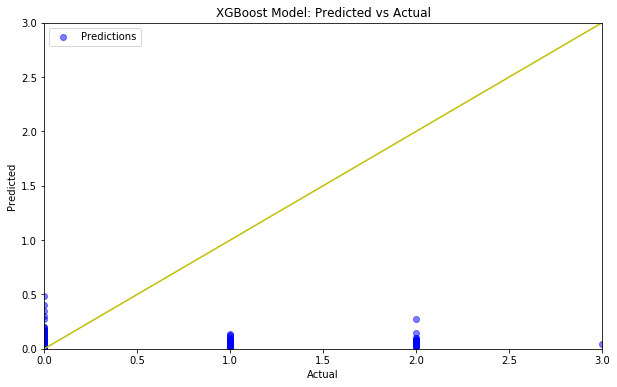

    MAE = 0.0785
    MAPE = inf%
    RMSE = 0.2348
    MAE as % std dev of Actuals = 33.3%
    Normalized RMSE (% of MinMax of Actuals) = 8%
    Normalized RMSE (% of Std Dev of Actuals) = 100%
    Time taken for Ensembling: 46.4 seconds
########################################################
Completed Ensemble predictions on held out data


<Figure size 720x432 with 0 Axes>

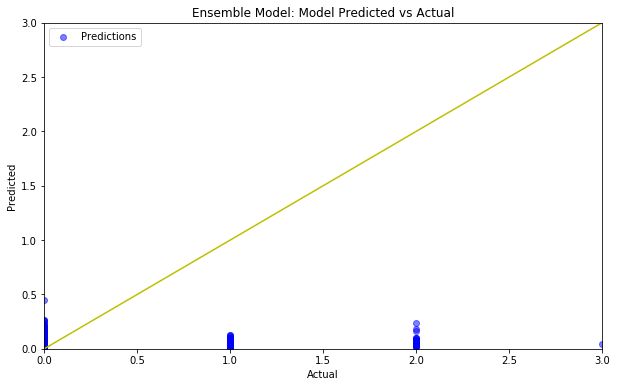

    MAE = 0.0779
    MAPE = inf%
    RMSE = 0.2348
    MAE as % std dev of Actuals = 33.0%
    Normalized RMSE (% of MinMax of Actuals) = 8%
    Normalized RMSE (% of Std Dev of Actuals) = 100%
After multiple models, Ensemble Model Results:
    RMSE Score = 0.4

Single Model is better than Ensembling Models for this data set.


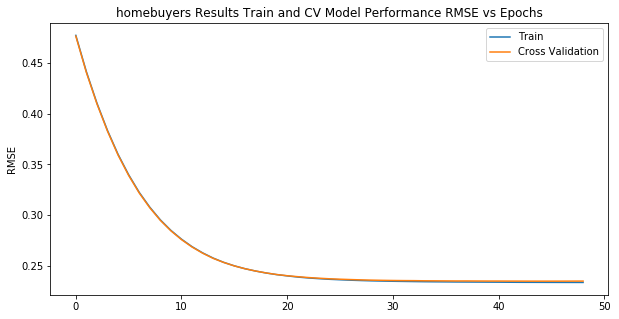

    Time taken for this Target (in seconds) = 1318
[10:20:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:20:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Plotting Feature Importances to explain the output of model

###################################################################################
Training model on complete Train data and Predicting using give Test Data...
    No Entropy Binning specified or there are no numeric vars in data set to Bin
[10:20:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Training time taken in seconds = 2
########################################################
Completed Ensemble predictions on held out data
    Savi

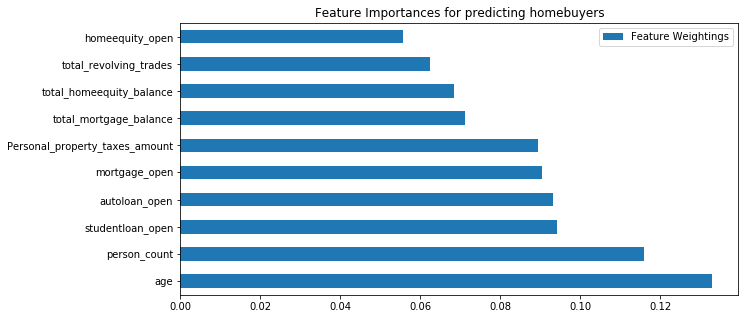

In [56]:

## second time without first homebuyer

sample_submission=''
scoring_parameter = 'balanced-accuracy'

m1, feats1, trainm1, testm1 = Auto_ViML(train1, target_variable_name, test1, sample_submission,
                                    scoring_parameter=scoring_parameter,
                                    hyper_param='GS',feature_reduction=True,
                                     Boosting_Flag=True,Binning_Flag=False,
                                    Add_Poly=0, Stacking_Flag=False,                                    
                                    Imbalanced_Flag=False, 
                                    verbose=1)


In [57]:


testm1

,person_count,autoloan_open,total_homeequity_balance,total_revolving_util,mortgage_open,total_mortgage_balance,age,studentloan_open,bankcard_balance,homeequity_open,Personal_property_taxes_amount,zip5_sep,total_revolving_trades,homebuyers_LassoLarsCV Regression_predictions,homebuyers_LassoCV Regularization_predictions,homebuyers_RidgeCV Regression_predictions,homebuyers_Bagging2_predictions,homebuyers_XGBoost_predictions,homebuyers_Ensembled_predictions
946320,0.021583,0.375000,0.000000,0.008310,0.625000,0.013189,0.476294,0.125000,0.063419,0.000000,0.003123,0.162154,0.496875,0.032414,0.032379,0.032386,0.05,0.029389,0.035314
2791275,0.122302,0.227273,0.005753,0.036143,0.045455,0.001041,0.358516,0.136364,0.026059,0.102273,0.006442,0.439949,0.180682,0.033951,0.034401,0.033996,0.00,0.021231,0.024716
1707955,0.007194,0.000000,0.000000,0.005448,0.333333,0.011640,0.649354,0.000000,0.008467,0.000000,0.097023,0.289343,0.175000,-0.007468,-0.007713,-0.007558,0.04,0.012951,0.006042
1034519,0.021583,0.500000,0.000000,0.029418,0.250000,0.020413,0.297365,0.500000,0.043006,0.000000,0.017960,0.181749,0.346875,0.047009,0.046879,0.047038,0.01,0.038891,0.037963
3168946,0.064748,0.214286,0.018445,0.020004,0.214286,0.011869,0.339247,0.000000,0.060976,0.000000,0.120351,0.486188,0.342857,0.032511,0.033117,0.032512,0.02,0.039951,0.031618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3705501,0.100719,0.210526,0.011214,0.028349,0.421053,0.010280,0.505173,0.000000,0.102532,0.118421,0.014348,0.607705,0.410526,0.024984,0.026163,0.025107,0.03,0.036806,0.028612
4343738,0.086331,0.411765,0.000000,0.021387,0.235294,0.012537,0.448129,0.058824,0.141121,0.000000,0.170717,0.769343,0.564706,0.054223,0.054009,0.054249,0.06,0.039844,0.052465
4510495,0.129496,0.608696,0.000000,0.033154,0.086957,0.007616,0.305601,0.130435,0.079128,0.048913,0.026452,0.784186,0.247826,0.063018,0.062427,0.062971,0.06,0.051829,0.060049
1335275,0.057554,0.384615,0.000000,0.013656,0.076923,0.030270,0.108489,0.307692,0.046129,0.000000,0.468912,0.215501,0.167308,0.070275,0.068170,0.070059,0.23,0.066862,0.101073


In [58]:
m1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=99,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=99, silent=None,
       subsample=0.5, verbosity=1)

In [81]:
path2

'C:\\Users\\ADMIN\\Desktop\\Brown_Datathon'

In [82]:
hold_out_set = pd.read_csv(path2+'/'+'zip9_coded_201909_wh.csv')
# new_econ_df.column = ['zip5', 'Personal_property_taxes_amount']
# new_econ_df.head()

In [89]:
demo_df2 = pd.read_csv(path2+'/'+'zip9_demographics_unlabeled_wh_test.csv')

In [90]:
hold_out_set.rename(columns={'zip5': 'zip5_sep'}, inplace=True)
hold_out_set2 = hold_out_set.merge(demo_df2,
                              how='inner',
                              on='zip9_code',
                              suffixes=('_sep','_demo'),
                              validate='one_to_one')
hold_out_set2.head()

,zip5_sep,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,...,total_homeequity_trades,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open,age,household_count,person_count
0,48642,19,27890.000000,5856.800000,2.400000,0.453984,38360.700000,11926.000000,4.900000,0.397245,...,0.200,65.0,0.400000,0.1000,0.700000,0.2000,0.700000,39.595003,5,10
1,84401,26,10540.384615,597.384615,1.923077,0.295520,12853.769231,1069.153846,3.461538,0.310865,...,0.000,NaN,0.153846,0.0000,0.615385,0.0000,0.230769,44.305918,8,13
2,33306,34,34677.500000,5236.062500,3.062500,0.263185,39038.375000,5763.437500,4.437500,0.250530,...,0.125,0.0,0.125000,0.3125,0.937500,0.1875,0.562500,43.410437,7,16
3,30635,41,2130.000000,988.400000,0.600000,0.527898,3161.700000,1790.400000,1.300000,0.772320,...,0.000,NaN,0.100000,0.1000,0.300000,0.0000,0.000000,47.472603,8,10
4,33770,42,10335.000000,7250.500000,3.625000,0.758408,17663.375000,11296.375000,7.250000,0.656051,...,0.000,NaN,0.500000,0.1250,0.875000,0.0000,0.125000,49.252096,5,8


In [91]:
# hold_out_set2

hold_out_set2 = hold_out_set2.fillna(0)
# hold_out_set.rename(columns={'zip5': 'zip5_sep'}, inplace=True)


hold_out_set3 = hold_out_set2.merge(new_econ_df,
                              how='inner',
                              on='zip5_sep',
                              suffixes=('_sep','_demo'),
                              validate='many_to_many')



In [92]:
hold_out_set3.head()

,zip5_sep,zip9_code,bankcard_limit,bankcard_balance,bankcard_trades,bankcard_util,total_revolving_limit,total_revolving_balance,total_revolving_trades,total_revolving_util,...,homeequity1_loan_to_value,autoloan_open,studentloan_open,bankcard_open,homeequity_open,mortgage_open,age,household_count,person_count,Personal_property_taxes_amount
0,48642,19,27890.000000,5856.800000,2.400000,0.453984,38360.700000,11926.000000,4.900000,0.397245,...,65.0,0.400000,0.100000,0.700000,0.200,0.700000,39.595003,5,10,1.551658
1,48642,102665,2902.777778,958.666667,0.944444,0.541200,5562.222222,1855.055556,1.777778,0.359070,...,0.0,0.333333,0.055556,0.500000,0.000,0.111111,49.034216,11,18,1.551658
2,48642,221422,787.500000,319.750000,0.500000,0.406032,1608.125000,853.875000,1.625000,0.700502,...,84.0,0.250000,0.125000,0.125000,0.125,0.125000,37.766089,7,8,1.551658
3,48642,250155,60935.500000,5067.285714,5.500000,0.137821,69317.142857,5753.357143,8.357143,0.193903,...,0.0,0.214286,0.071429,0.857143,0.000,0.714286,47.165460,9,14,1.551658
4,48642,487507,6600.000000,4272.222222,1.111111,0.567185,10990.666667,6093.444444,2.333333,0.300948,...,0.0,0.333333,0.111111,0.444444,0.000,0.111111,39.642545,6,9,1.551658


In [100]:
hold_out_set4= hold_out_set3[['person_count', 'age', 
                        'mortgage_open', 'studentloan_open', 'bankcard_balance', 
                        'total_revolving_util', 'total_revolving_trades', 'autoloan_open', 
                         'total_homeequity_balance', 'total_mortgage_balance', 
                        'zip5_sep', 'homeequity_open', 'Personal_property_taxes_amount']]




In [102]:
hold_out_set5= hold_out_set4[['person_count', 'autoloan_open', 'total_homeequity_balance', 'total_revolving_util', 'mortgage_open', 'total_mortgage_balance', 'age', 'studentloan_open', 'bankcard_balance', 'homeequity_open', 'Personal_property_taxes_amount', 'zip5_sep', 'total_revolving_trades']]

# output = m1.predict(data=hold_out_set3)
# list(hold_out_set4.columns)




In [95]:
list(train_X1.columns)


# output = m1.predict(data=hold_out_set)
# final_df = pd.DataFrame()

['person_count',
 'age',
 'mortgage_open',
 'studentloan_open',
 'bankcard_balance',
 'total_revolving_util',
 'total_revolving_trades',
 'autoloan_open',
 'total_homeequity_limit',
 'total_homeequity_balance',
 'total_mortgage_balance',
 'zip5_sep',
 'homeequity_open',
 'Personal_property_taxes_amount']

In [103]:
output = m1.predict(data=hold_out_set5)

In [106]:
# output
aaa = pd.DataFrame(output)
aaa.head()

,0
0,0.579089
1,0.329119
2,0.425249
3,0.416370
4,0.329119


In [107]:
aaa.to_csv('result01.csv', index = False)